/var/folders/b1/z91xjqp97qb1ts5z67d5h7f00000gn/T/ipykernel_1393/1961728472.py:90: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


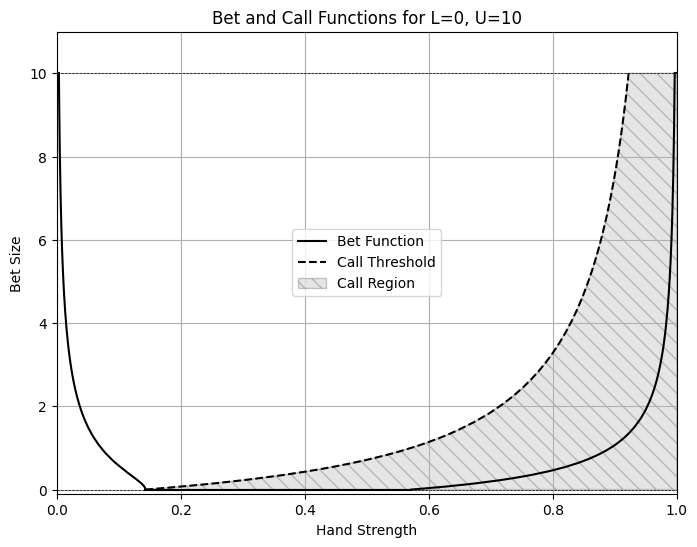

In [2]:
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_wolfram_lines(json_files, metadata=None, x_label="x", y_label="y", title="Wolfram Lines", figsize=(8, 6), fig=None, ax=None):
    """
    Plots arbitrary sets of lines exported from Wolfram as JSON files, using black-and-white-friendly styles.

    Parameters:
        json_files (list of tuples): List of tuples where each tuple contains the path to a JSON file and its label.
        x_label (str): Label for the x-axis.
        y_label (str): Label for the y-axis.
        title (str): Title of the plot.
        figsize (tuple): Size of the figure (width, height).
        fig (matplotlib.figure.Figure, optional): Existing figure to plot on. If None, a new figure is created.
        ax (matplotlib.axes.Axes, optional): Existing axes to plot on. If None, new axes are created.
    """
    # Define a list of line styles and hatching patterns for black-and-white readability
    line_styles = ["-", "--", "-.", ":"]
    hatching_patterns = ["//", "\\\\", "||", "--", "xx", ".."]

    # Create figure and axes if not provided
    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    # Initialize a variable to track if the shaded region legend is added
    shaded_region_added = False

    if metadata:
        with open(metadata, "r") as file:
            metadata_content = json.load(file)
            L = metadata_content["Parameters"]["L"]
            U = metadata_content["Parameters"]["U"]

    for idx, (json_file, label) in enumerate(json_files):
        # Load the exported JSON file
        with open(json_file, "r") as file:
            line_data = json.load(file)

        # Use line styles and hatching patterns for black-and-white readability
        line_style = line_styles[idx % len(line_styles)]

        for i, plot_lines in enumerate(line_data):
            for line in plot_lines:
                x, y = zip(*line)  # Unpack the points into x and y
                ax.plot(x, y, linestyle=line_style, color="black", label=label if i == 0 else "")

                # Add shaded region for the call function line with hatching
                if label == "Call Threshold" and not shaded_region_added:
                    ax.fill_betweenx(
                        y, x, 1, color="gray", alpha=0.2, edgecolor="black", hatch=hatching_patterns[idx % len(hatching_patterns)]
                    )
                    # Add a proxy artist for the shaded region to the legend
                    shaded_region_legend = Patch(facecolor="gray", edgecolor="black", alpha=0.2, hatch=hatching_patterns[idx % len(hatching_patterns)], label="Call Region")
                    shaded_region_added = True

    # Set plot limits, labels, and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.1, U*1.1)
    ax.set_title(f"Bet and Call Functions for L={L}, U={U}")
    ax.grid(True)

    # add dotted grey horizontal lines at y=U and y=L
    ax.axhline(y=U, color='black', linestyle='--', linewidth=0.5)
    ax.axhline(y=L, color='black', linestyle='--', linewidth=0.5)

    # Add the legend, including the shaded region
    handles, labels = ax.get_legend_handles_labels()
    if shaded_region_added:
        handles.append(shaded_region_legend)
        labels.append("Call Region")
    ax.legend(handles, labels)

    # Return the figure and axes for further customization
    return fig, ax

fig, ax = plot_wolfram_lines(
    json_files=[
        ("betFunction.json", "Bet Function"),
        ("callFunction.json", "Call Threshold")
    ],
    metadata="metadata.json",
    x_label="Hand Strength",
    y_label="Bet Size",
    figsize=(8, 6)
)

fig.show()
